# Overview of today's class

- Review the results of the initial survey

- Review what we talked about for the OriC problem

- Adjust the rules a little bit: embrace the automated help

- Start coming up with 'real' approaches to solving OriC problem

- Learning some python along the way

- Homework 1 released today, linked from Canvas to GitHub



# Slides as Jupyter Notebooks

- They mare available on my Github

- The link is here: https://github.com/mckennalab/gene_146 

- You won't have to know git for this class, but exposure is good


# Results of the inital survey

- Canvas doesn't wrap text boxes in their CSV output, so it's one-off afair

- Overall a wide range of exposure to programming languages

- More Python experience than what the 'hands' survey showed


# Results of the inital survey

- Thoughts on projects:

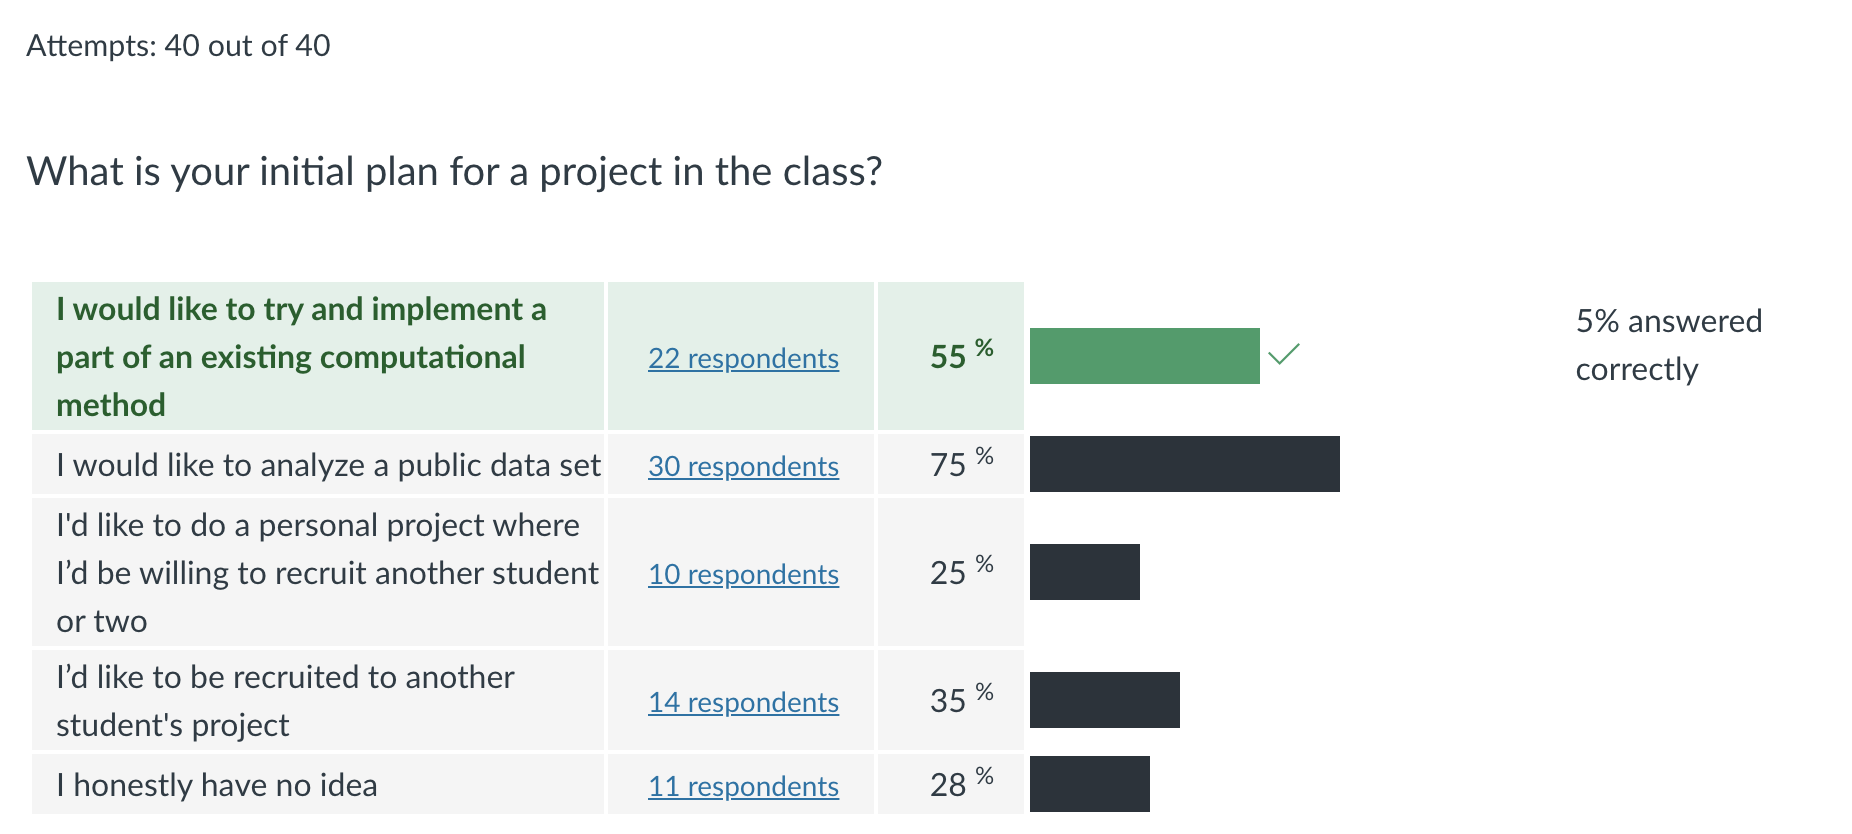

# Project assignments

- I'm going to parse this all out today and make a plan for groups

- I'll reach out to those who want to do their own project and get a sense for it

- Thursday we'll talk it through, highlight some options, and start divide people up

- We'll use Slack after class to help finalize things and for groups communication 


## Review of the OriC problem

Genome's replicate -- they have to, but where do they start?

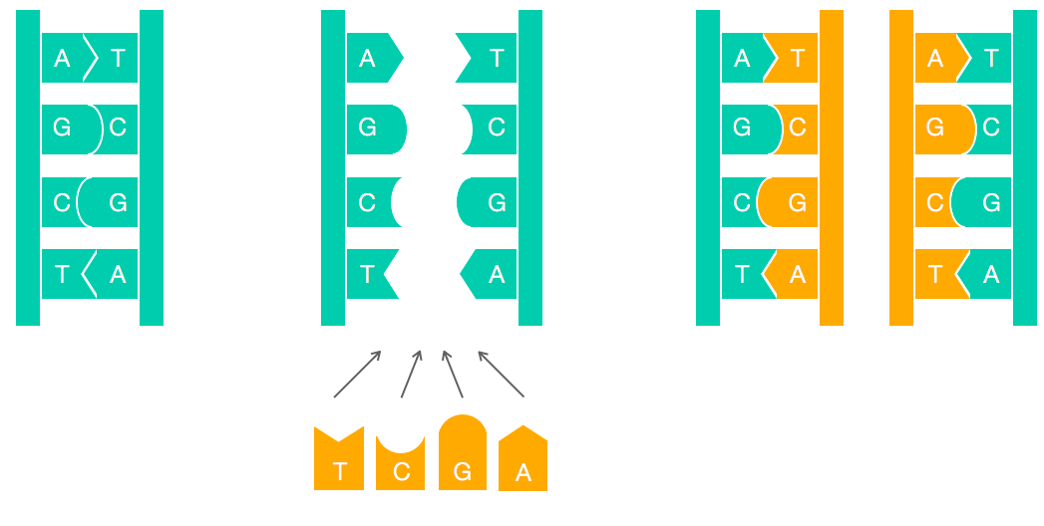

From _Bioinformatics Algorithms: An Active Learning Approach._


## Review of the OriC problem

Genome's replicate -- they have to, but where do they start?

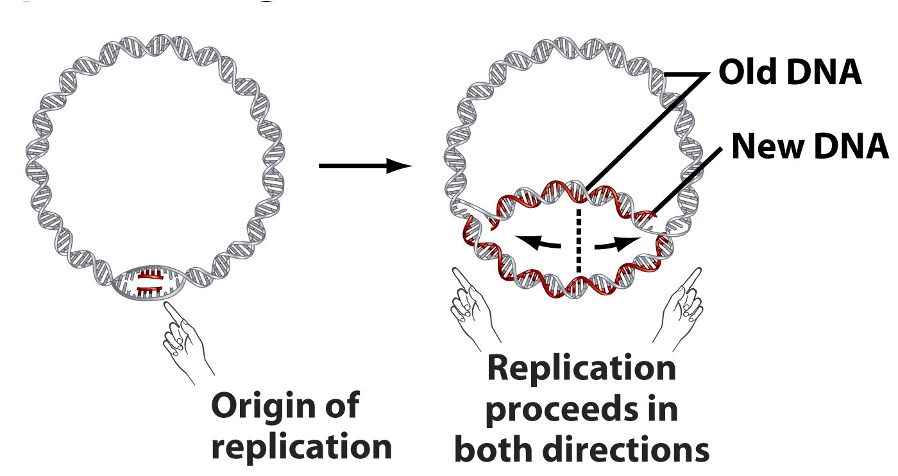

From _Bioinformatics Algorithms: An Active Learning Approach._


# From last time...

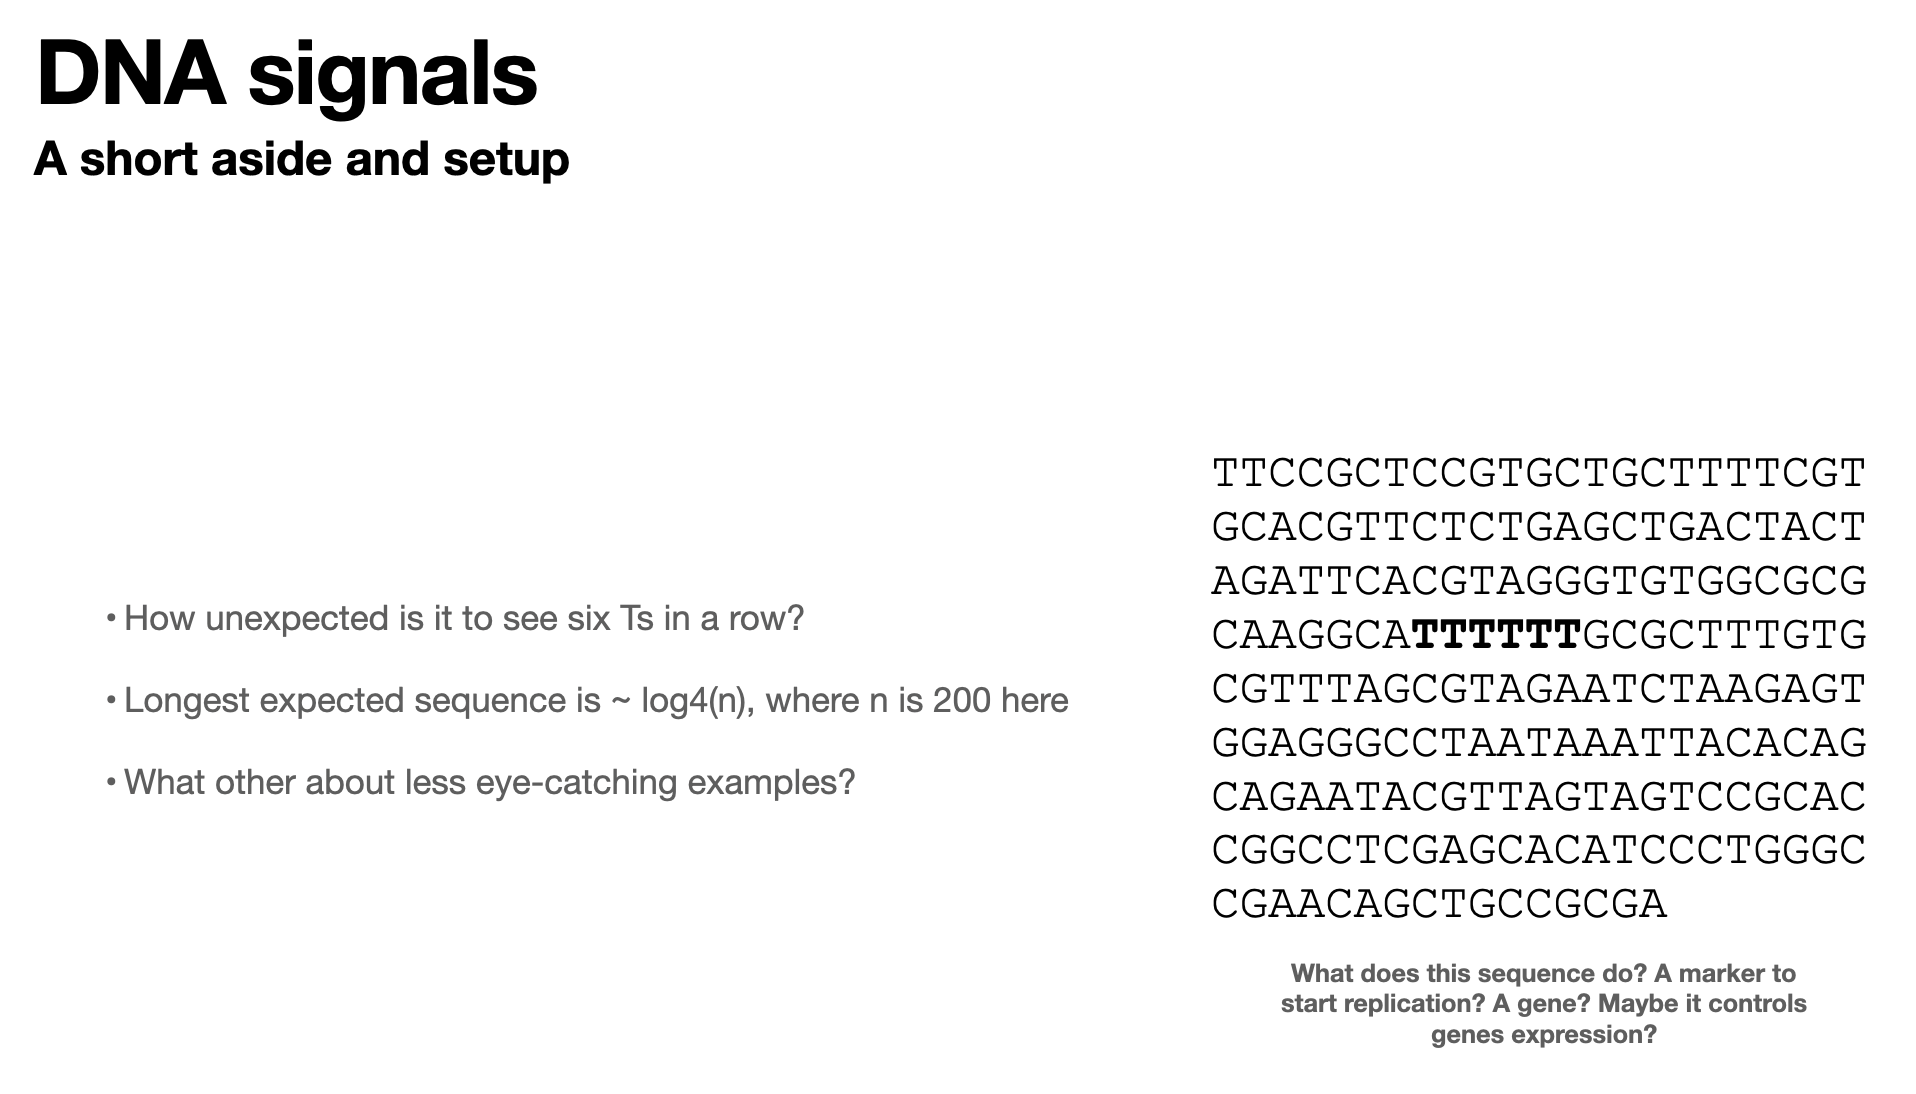

# Hopefully improve the class on the fly

- I'm being dumb trying to avoid tools (e.g. ChatGPT) available to you in the real world. I have a subscription and it's super empowering, even for an experienced software developer. You will too in the 'real world'.

- We will allow and incorportate those tools into the homeworks and lessons **unless explicitly mentioned**

- Homework was is out tonight; it's now adjusted to use ChatGPT to help solve some of the problems we'll look at in this lecture. We'll also adjust the future homeworks.

- In the end this might (?) make the challenge greater, as it pushes expectations up and your thinking to a 'higher level'. We'll see!

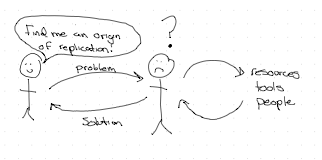

### Back to the lecture: Let's focus on defining the problem

- The book does a really nice job focusing on this 

- How do we breakdown a high level question like this:
    'find the origin(s) of replication for a genome'
    
- How would we start solving this? Let's make it a little more precise: 
  - Given a genome as input, output the location of the origin of replication
  - What is defined? What isn't?
  
  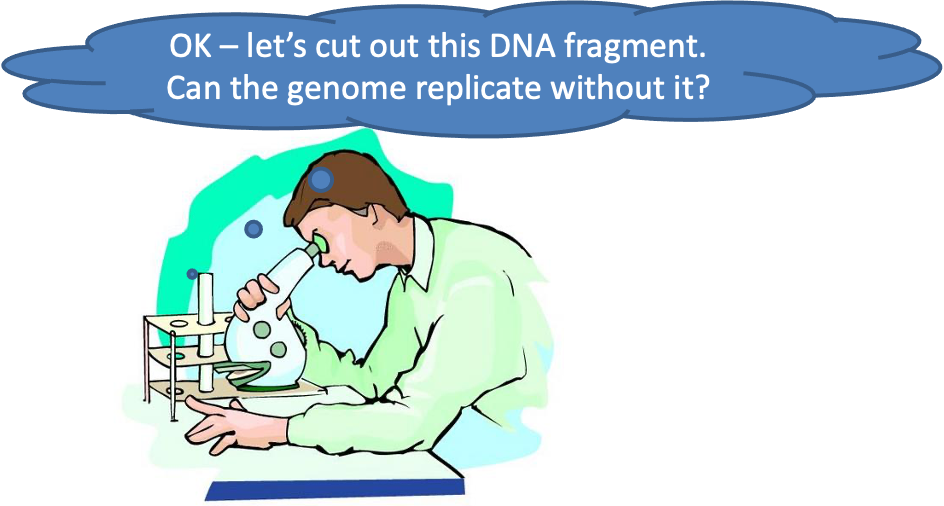
  
  Image from _Bioinformatics Algorithms: An Active Learning Approach._

## Experimental perspective

Some hints as to how to solve this as a compuational problem:
- How does a protein know how to bind to a specific location in the genome?
- How many of these binding sites does it take? Is more better? Or just and only one? 
- How long should a recognition site be? 
- Or is it GC dependent? Or is it....

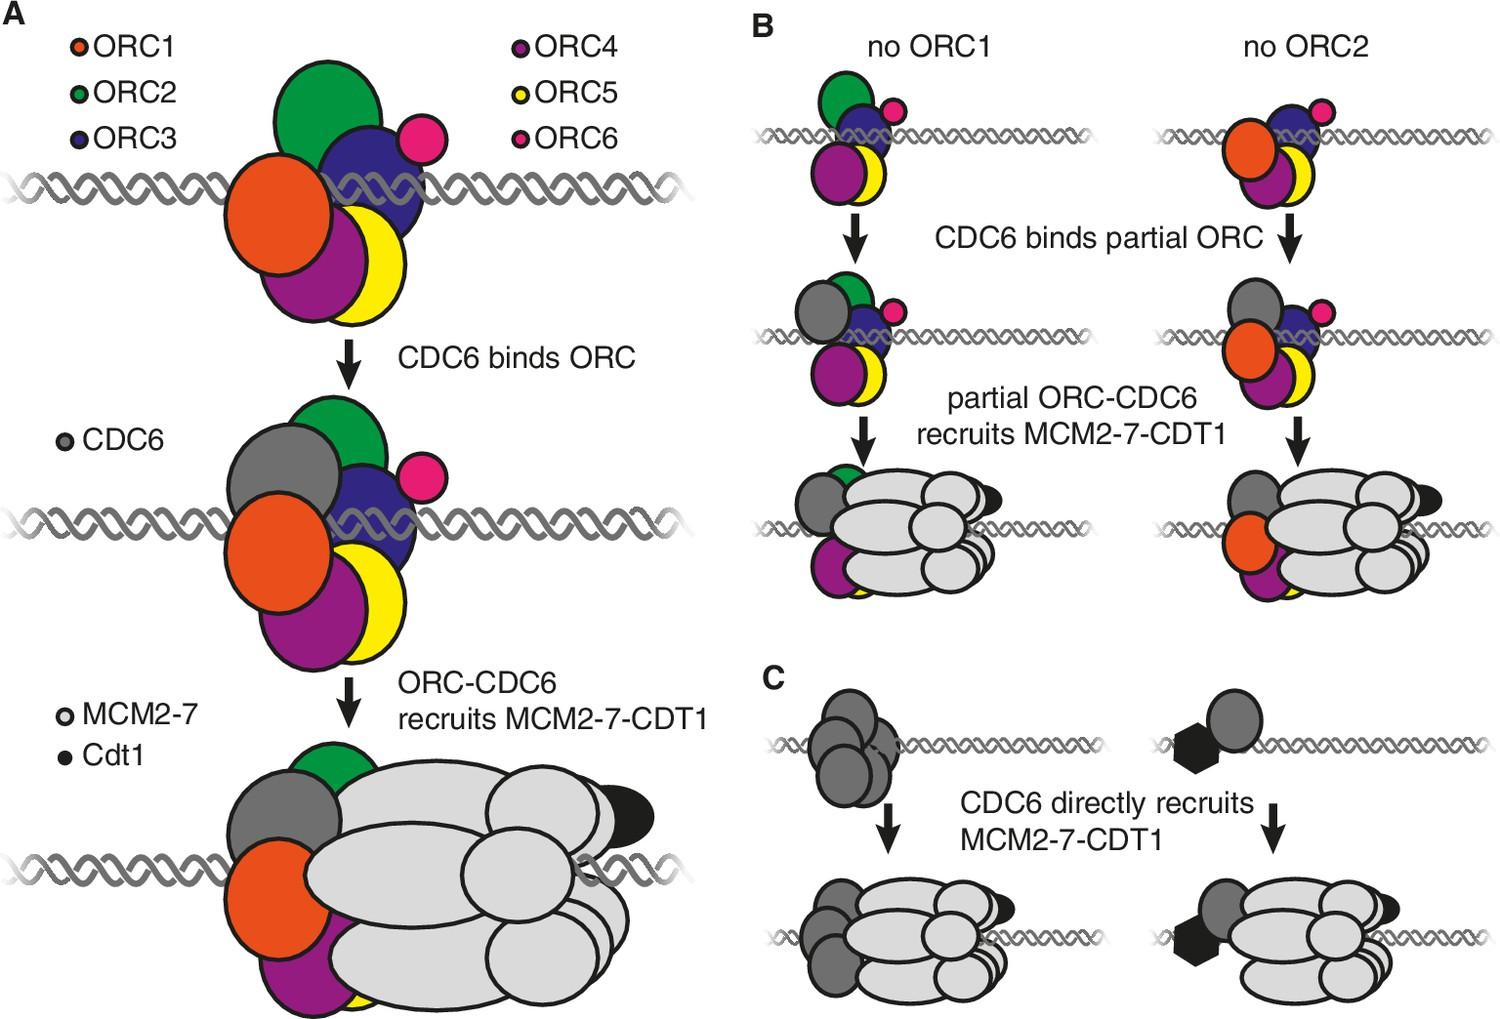

Image from _DNA Replication: Rethinking origin licensing_ ELife, 2017

## Lets start from the end and try to work backwards

Here is the origin of replication in _Vibrio cholerae_, discovered by an 'experimental' friend of yours:

```
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
```

- How can we combine the idea that proteins have to bind to a small sequence of the genome with this known sequence to find more about the rules?

## Reformulation of the problem

### Problem: find the origin of replication signal, or 'hidden message' in this sequence
    - Input: Genome segment
    - Output: key replication sequences


- This is closer, but 'key replication sequences' isn't well defined


### Problem reformulation: find the most frequent _k-mers_ that dictate the origin of replication signal
    - Input: Genome segment
    - Output: most enriched kmer(s) in the sequence


- What's a kmer?

# What's a kmer (k-mer)

#### k = a number

#### Lets build some python code to create all the 3-mers

#### Let's take a quick aside into getting Python going

### Installing Python

- To install on your computer, [Anaconda](https://anaconda.org/) or miniconda are you best options

- Anaconda has all the bells and whistles (and is big), miniconda lets you make more choices

- If you want to avoid this [Google CoLab](https://colab.research.google.com/) lets you run code in your browser on Google's cloud

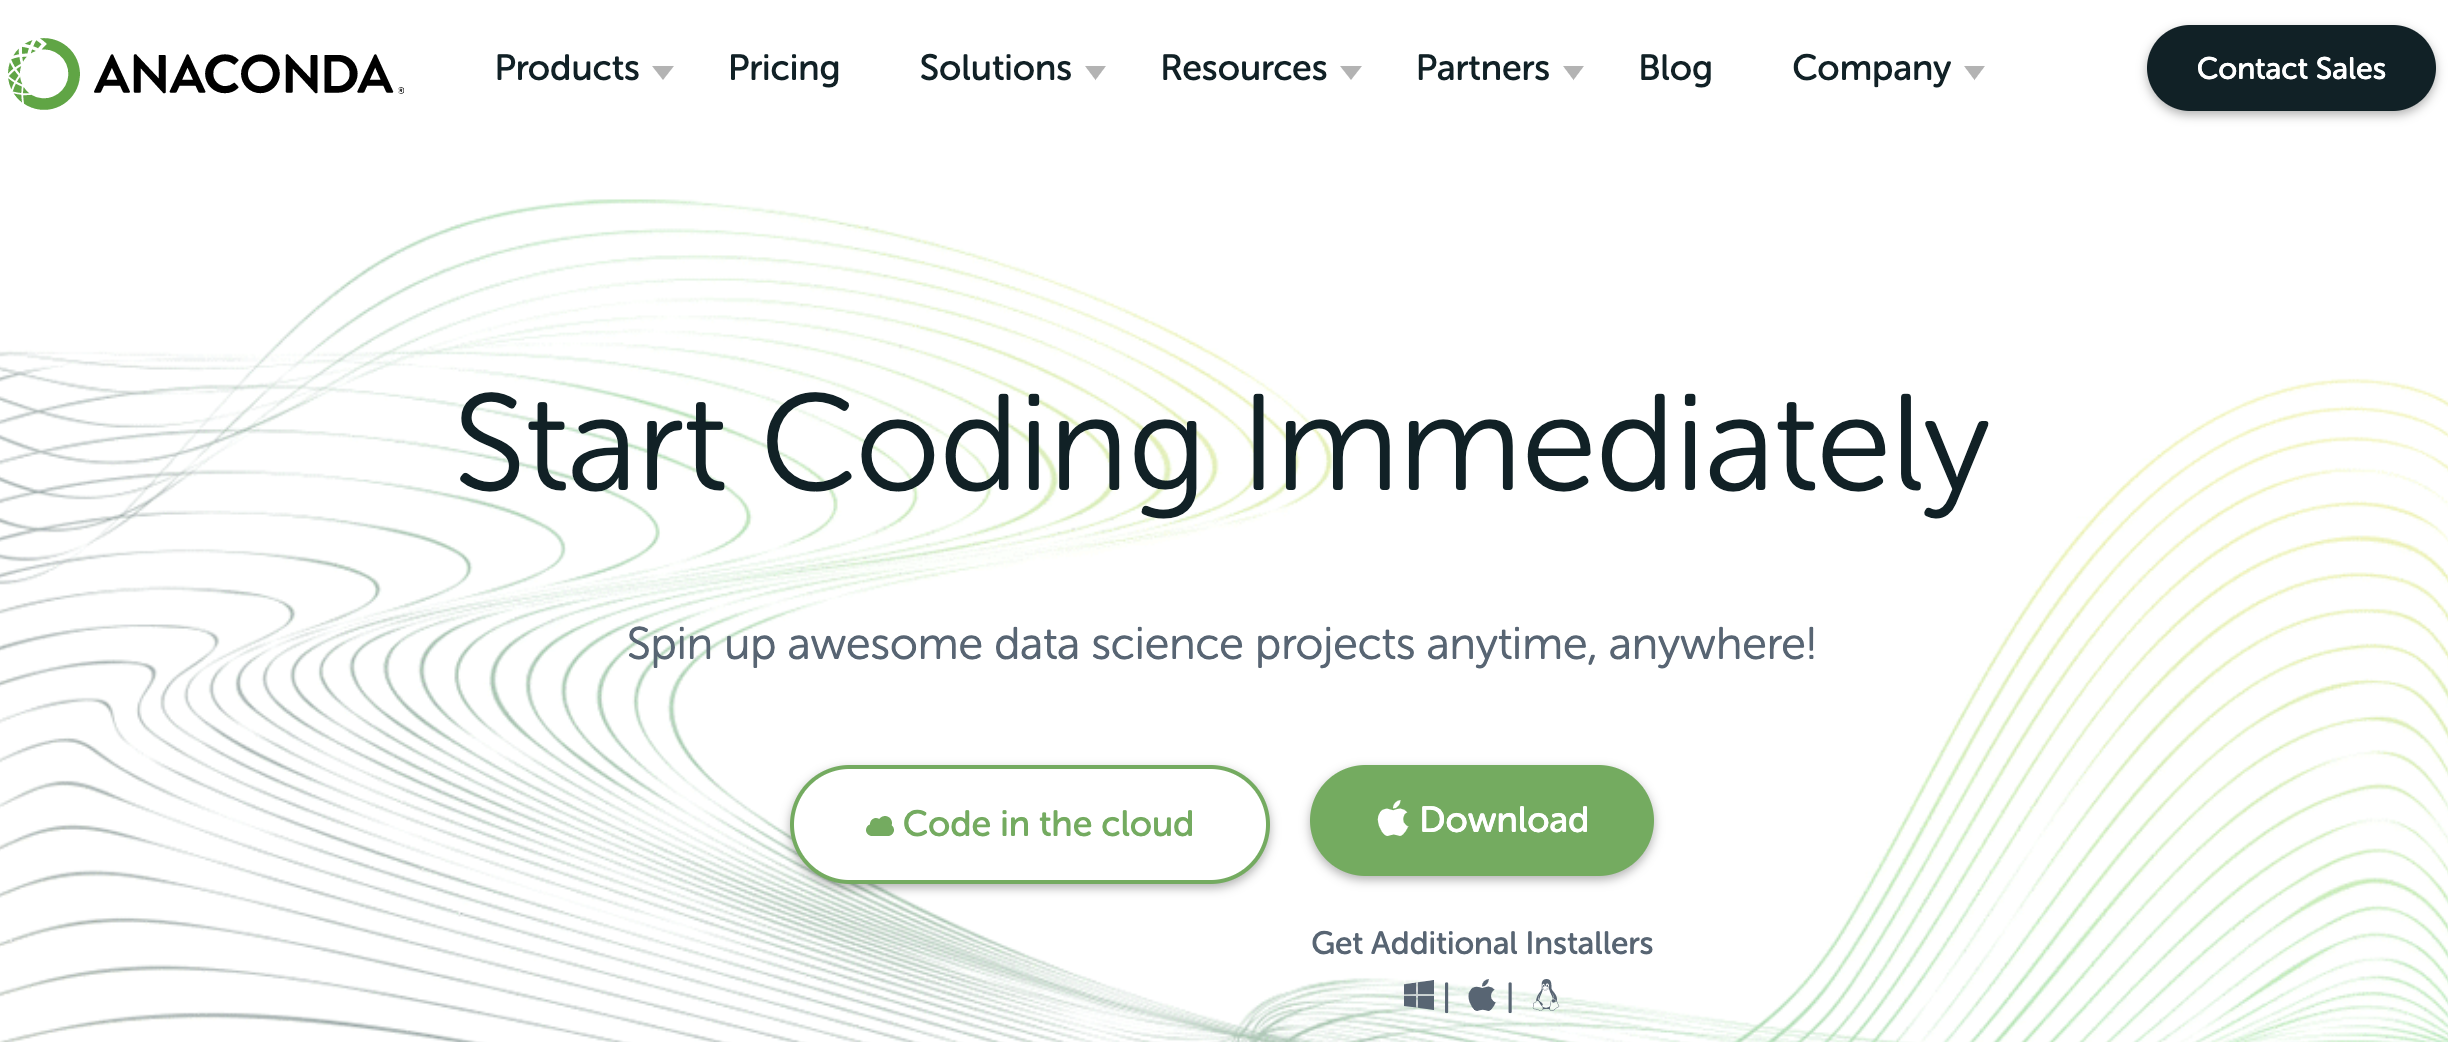

### Starting Python

- You can start Python using the command line, terminal in Mac/Unix, iterm2 in Mac, or powershell* in Windows

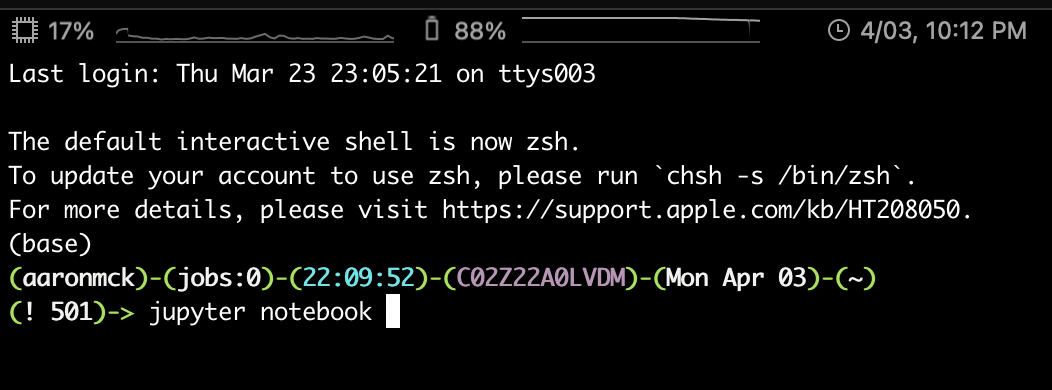



### Starting Python - by Anaconda

- When you're just starting out it's a bit easier to start Jupyter using the Anaconda App

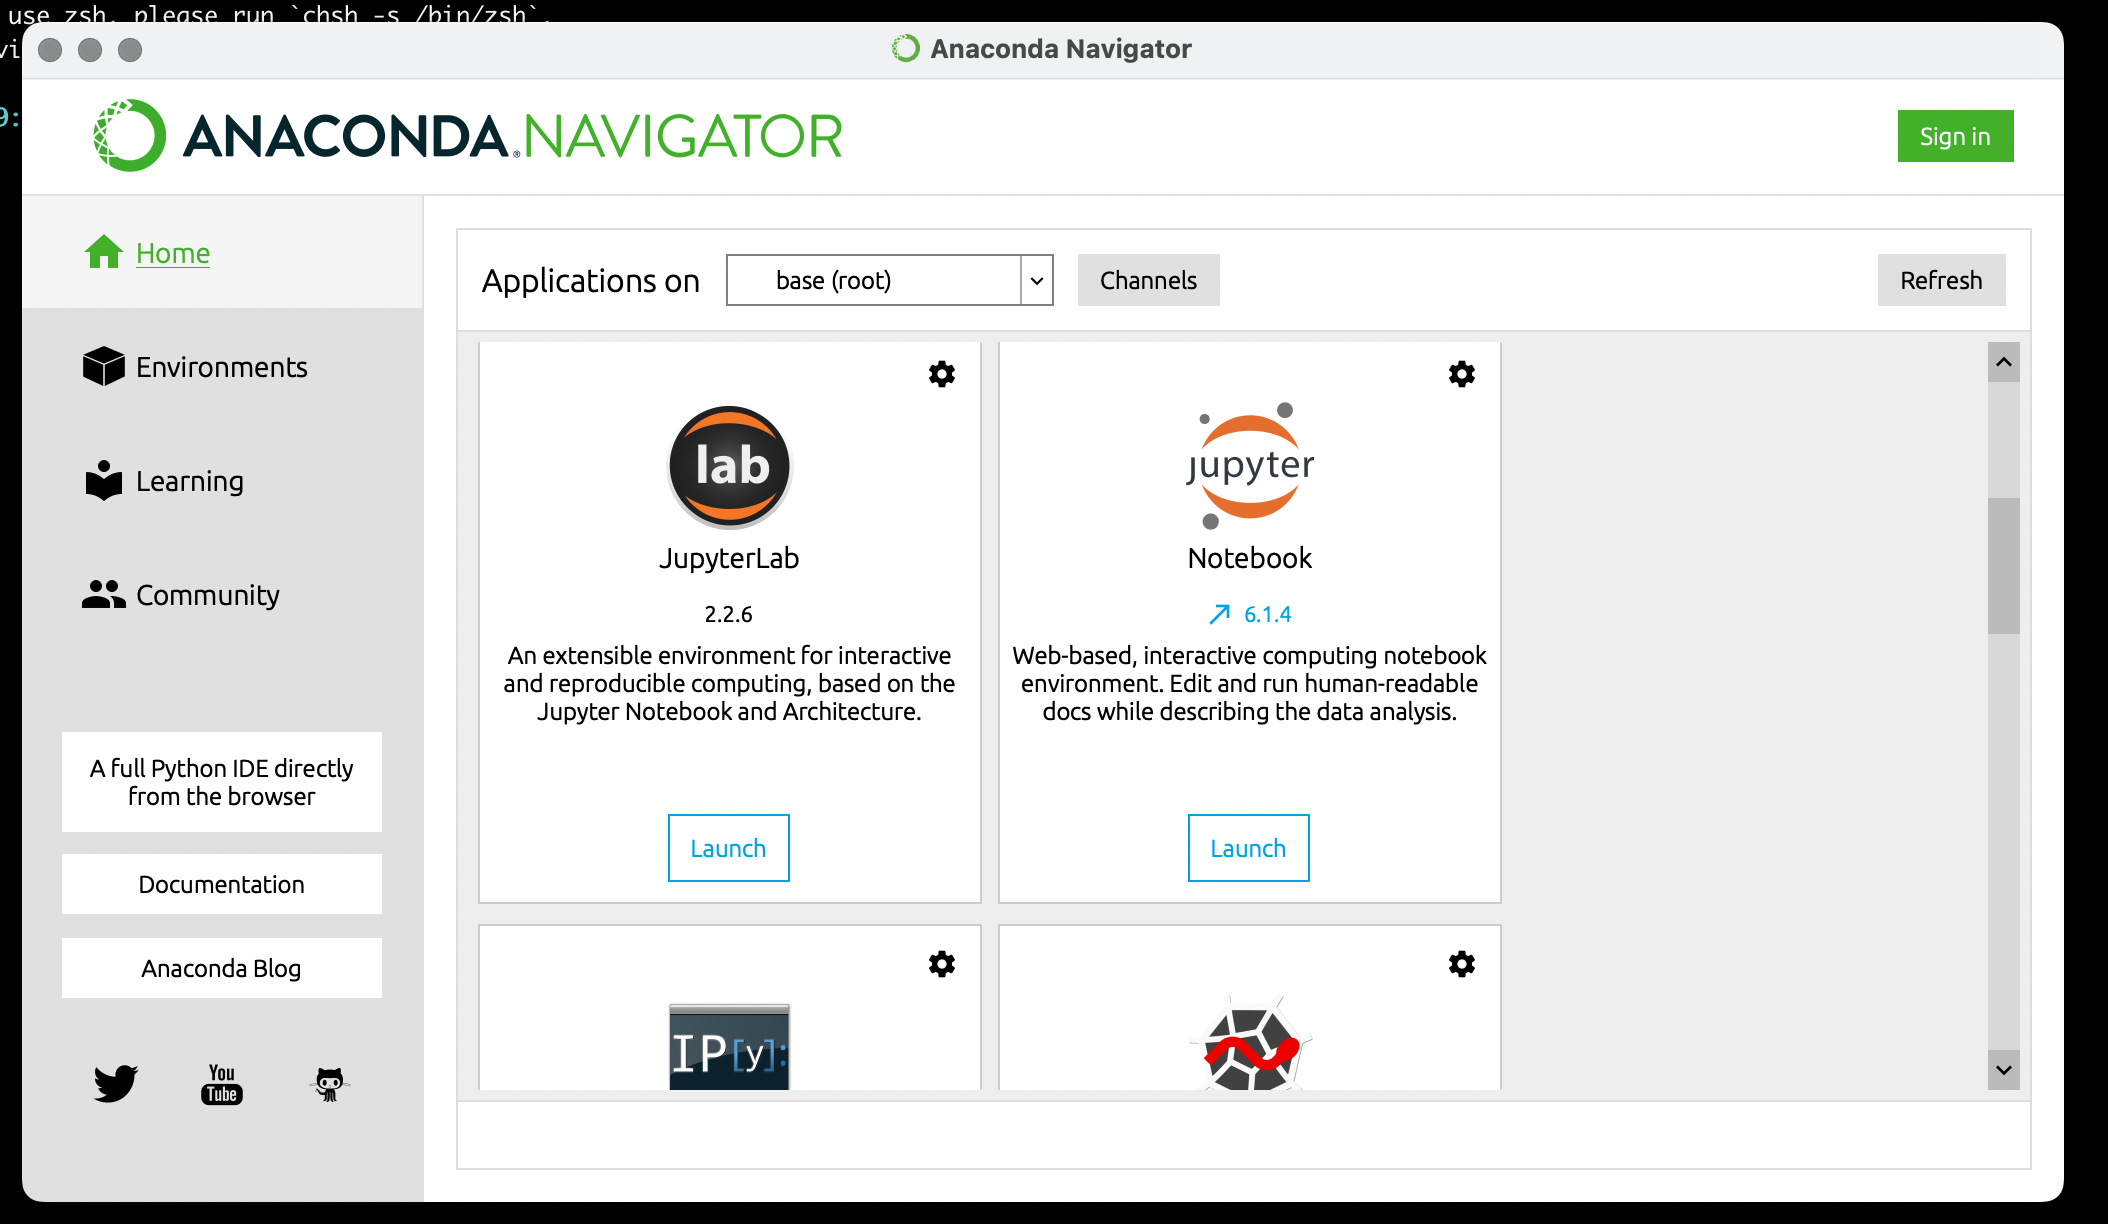

In [45]:
# define the 4 bases as members of a list
nucleotides = ['A', 'C', 'G', 'T'] # is this actually it? Check out the fasta spec.

# or make a list to store all 3-mers
all_three_mers = []

# this is not the best way to do this...
for i in nucleotides:
    for j in nucleotides:
        for k in nucleotides:
            # you can 'add' letters and string, or numbers, but not both
            # then we append this to the end of our list
            all_three_mers.append(i + j + k) 
           

In [46]:
import math
print("Print the fist kmer:")
print(all_three_mers[0])

print("\nPrint all kmers of length 3:")
print(all_three_mers)

print("\nHow many kmers should we expect:")
print(math.pow(4,3))
print(len(all_three_mers))

# make sure that the size of a unique set from out list is the same 
# length as the list itself -- a roundabout way to say no duplicates
assert(len(set(all_three_mers)) == len(all_three_mers))

Print the fist kmer:
AAA

Print all kmers of length 3:
['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC', 'AGG', 'AGT', 'ATA', 'ATC', 'ATG', 'ATT', 'CAA', 'CAC', 'CAG', 'CAT', 'CCA', 'CCC', 'CCG', 'CCT', 'CGA', 'CGC', 'CGG', 'CGT', 'CTA', 'CTC', 'CTG', 'CTT', 'GAA', 'GAC', 'GAG', 'GAT', 'GCA', 'GCC', 'GCG', 'GCT', 'GGA', 'GGC', 'GGG', 'GGT', 'GTA', 'GTC', 'GTG', 'GTT', 'TAA', 'TAC', 'TAG', 'TAT', 'TCA', 'TCC', 'TCG', 'TCT', 'TGA', 'TGC', 'TGG', 'TGT', 'TTA', 'TTC', 'TTG', 'TTT']

How many kmers should we expect:
64.0
64


# Most frequent kmer

AATTT is the most frequent kmer in the sequence: 

ACA**AATTT**GCAT**AATTT**CGGGA**AATTT**CCT

The most frequent kmer is one or more subsequences, of length k, that occurs most frequently within the overall sequence

## Still an open area of research

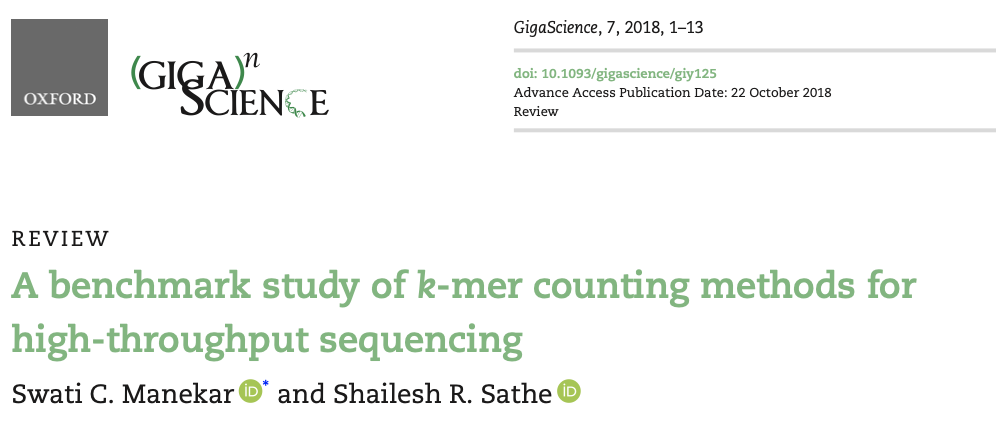



#### Also some good suggestions for tools and methods papers

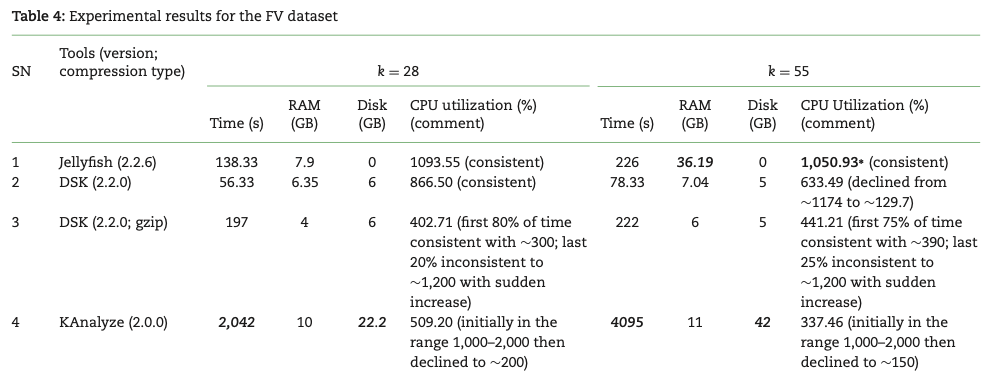

## Back to Cholera

Origin of replication:

```
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
```

### Problem: find the most frequent k-mers that dictate the origin of replication signal
- Input: Genome segment
- Output: most enriched kmer(s) in the sequence


## Back to Cholera

### Problem: find the most frequent k-mers that dictate the origin of replication signal
- Input: Genome segment
- Output: most enriched kmer(s) in the sequence

### Does this make sense to biologists?

- DNA polymerase and replication is mediated by a protein called DnaA.

- DnaA binds to short (typically 9 nucleotides long) segments within the replication origin known as a DnaA box. 

- A DnaA box is a hidden message telling DnaA: “bind here!” And DnaA wants to see multiple DnaA boxes. 

### DnaA in replication

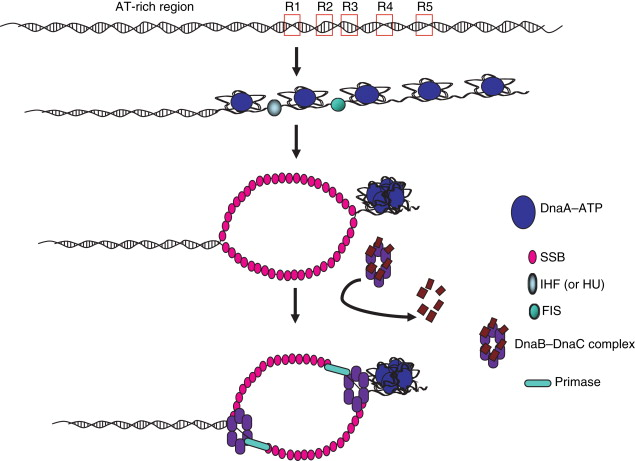

_Encyclopedia of Microbiology (Third Edition), 2009_

## Evolutionary prospective

#### This prospective motivates our computational approach to this -- does this solution make sense?

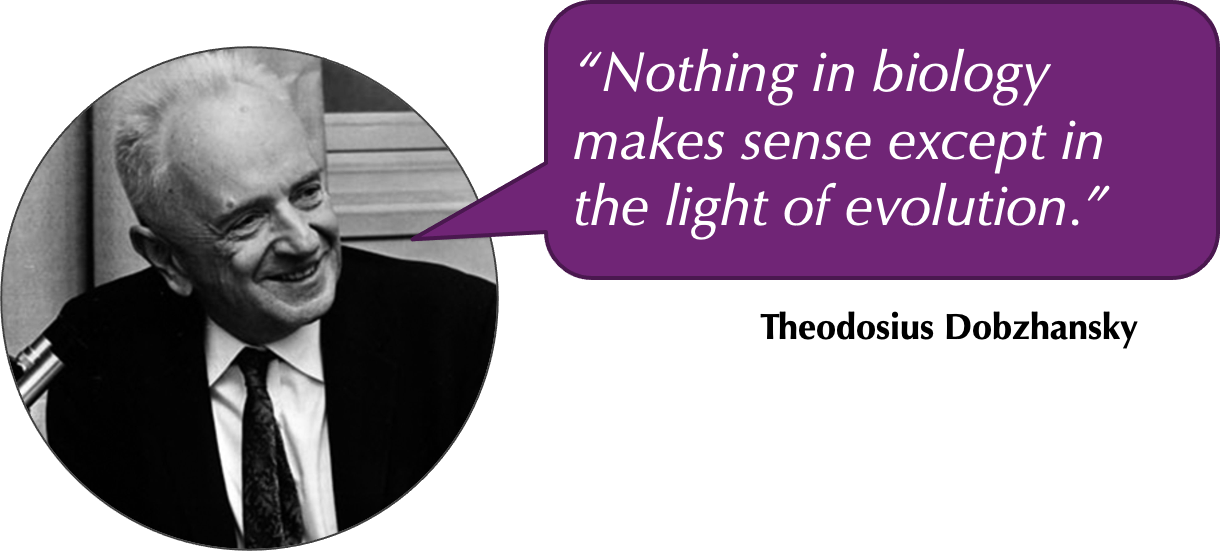

## Finding candidate k-mer binding locations

Four 9-mers are seen 3 times (**ATGATCAAG, CTTGATCAT** highlighted, other two TCTTGGATCA, CTCTTGATC):


atcaatgatcaacgtaagcttctaagc**ATGATCAAG**gtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaag**ATGATCAAG**agaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacct**CTTGATCAT**cgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagct**CTTGATCAT**gtttccttaaccctctattttttacggaaga**ATGATCAAG**ctgctgct**CTTGATCAT**cgtttc 

What's special about **ATGATCAAG** and **CTTGATCAT**?



In [47]:
# reverse complement of DNA:

# -------->
# ATGATCAAG
# TACTAGTTC
# <--------

def complement(base):
    if base == 'A' or base == 'a':
        return('T')
    elif base == 'C' or base == 'c':
        return('G')
    elif base == 'G' or base == 'g':
        return('C')
    elif base == 'T' or base == 't':
        return('A')
    else:
        return('N')

complement('C')

'G'

In [48]:
# now the function to actually do the reverse complement
def reverse_complement(input_string):
    complement_string = []
    
    for base in input_string:
        complement_string.append(complement(base))
        
    complement_string.reverse()
    
    return(''.join(complement_string))

print(reverse_complement("ATGATCAAG"))

CTTGATCAT


## Now there are 6...

So we have 6 total instances of **ATGATCAAG** and **CTTGATCAT** in the genome:

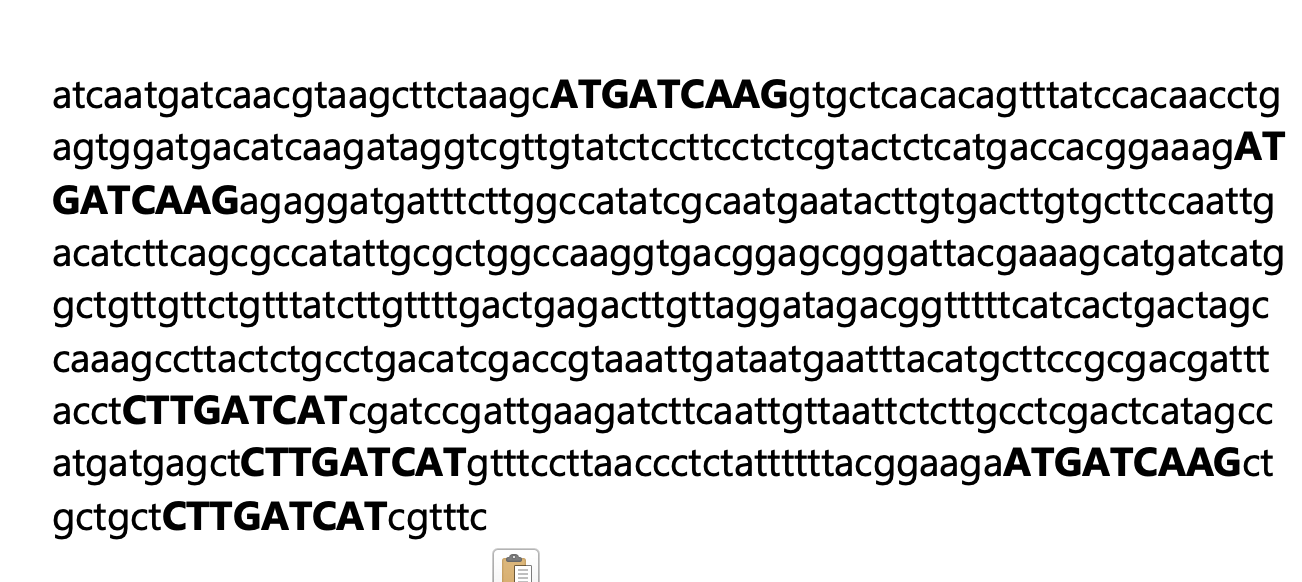

Is this unexpected? **Yes (how do we figure this out?)**




## Can we use the same approach in thermotoga petrophila

_A source of thermostable enzymes, isolated from a Japanese oil rig_

Experimentally determined origin or replication:
```
aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactgaaactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaattacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaaacaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggtttctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattcaagattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtatccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggtaagttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaacctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctgaaaagaggtggtaaaaaa
```

What if we determine the most frequent 9-mers here, do we see a signal too?

No hits for **ATGATCAAG** and **CTTGATCAT**, but new hits for AACCTACCA, ACCTACCAC, GGTAGGTTT, TGGTAGGTT, AAACCTACC, CCTACCACC 





## We have let the problem wander a bit


### Our 'problem reformulation': find the most frequent _k-mers_ that dictate the origin of replication signal
    - Input: Genome segment
    - Output: most enriched kmer(s) in the sequence


### Our original problem: find candidate origin of replication signals in the whole genome
    - Input: Genome segment
    - Output: Location(s) of the origin or replication

#### Can we leverage our experience in Cholera and Thermo and our tools to try something meaning in a new genome?

## Re-review of the OriC problem

Genome's replicate -- they have to, but where do they start?

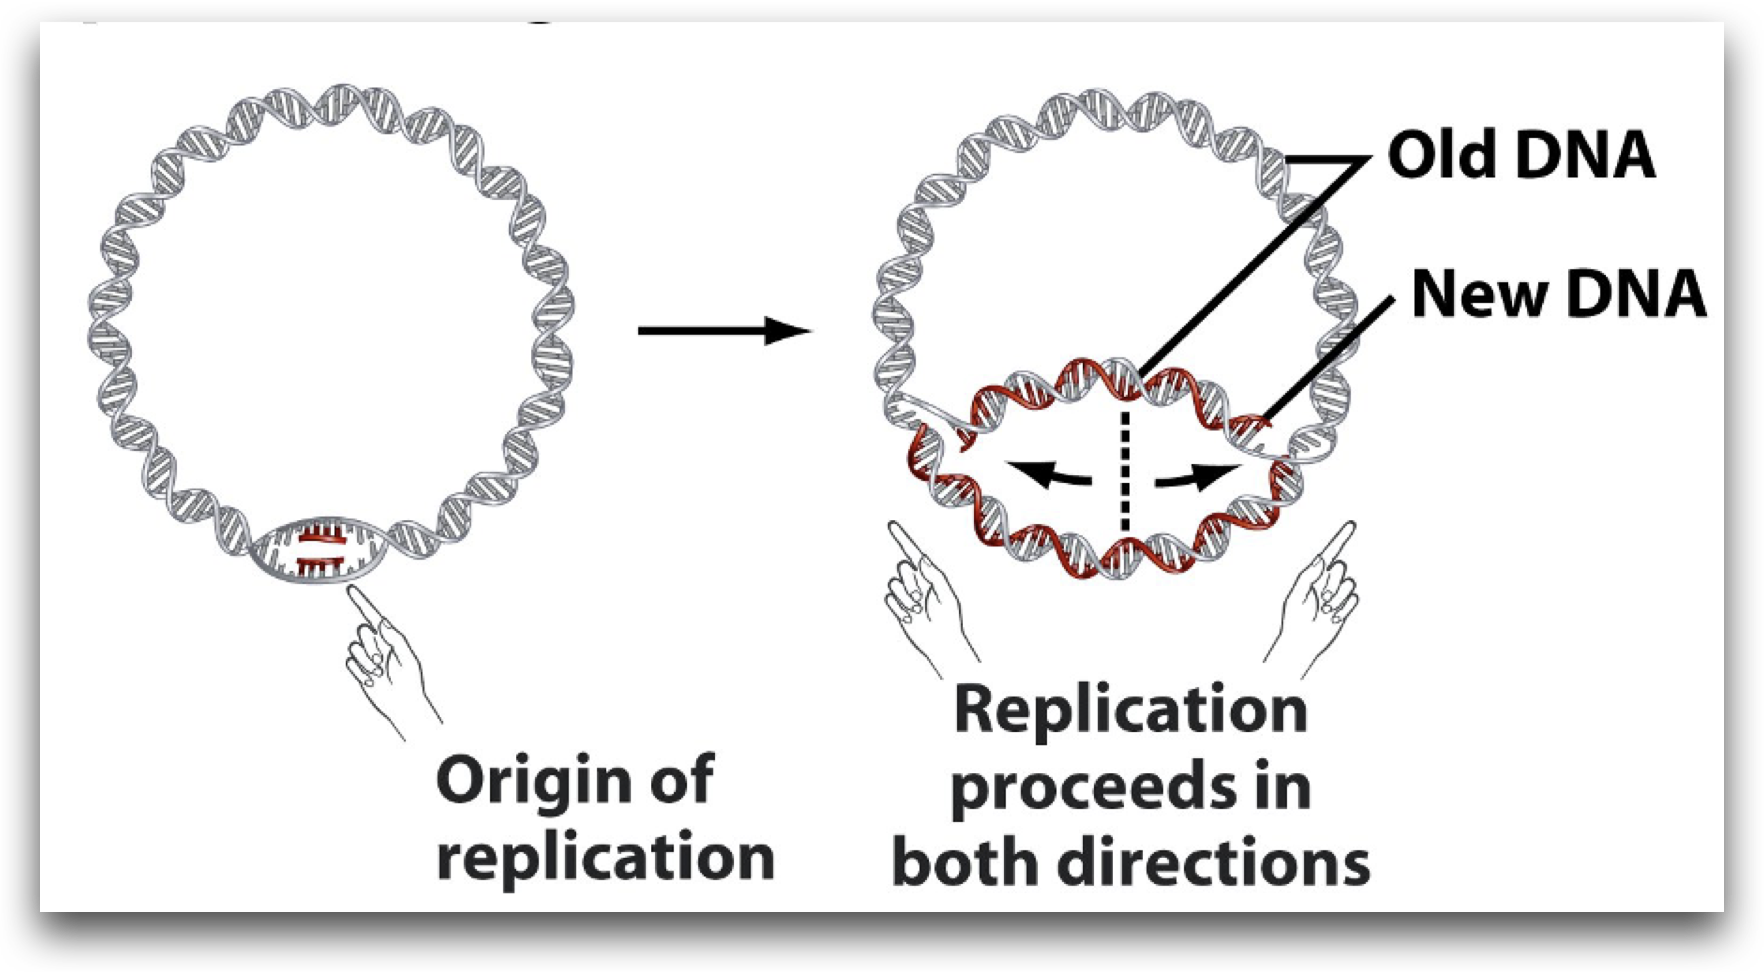

From _Bioinformatics Algorithms: An Active Learning Approach._


## Sliding window approach

- We have tools to find enriched k-mers with a set window size

- We could do this for all possible windows in a bacterial genome

- Using 500 basepair windows, a 1MB genome would have 2000 such windows

- What would we _do with the results_ of each window? Think about this for a minute

## Let's formalize this a little bit

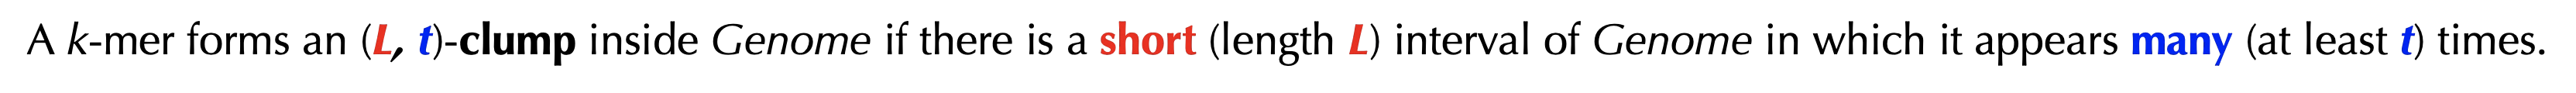

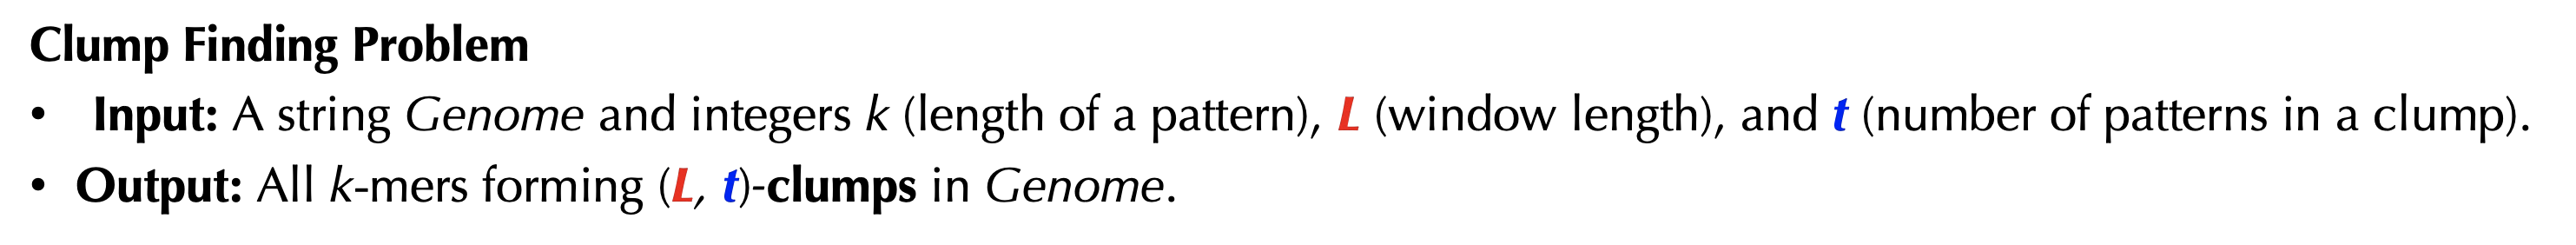

## Why might this be challenging? 

A hint from a previous class' slide:

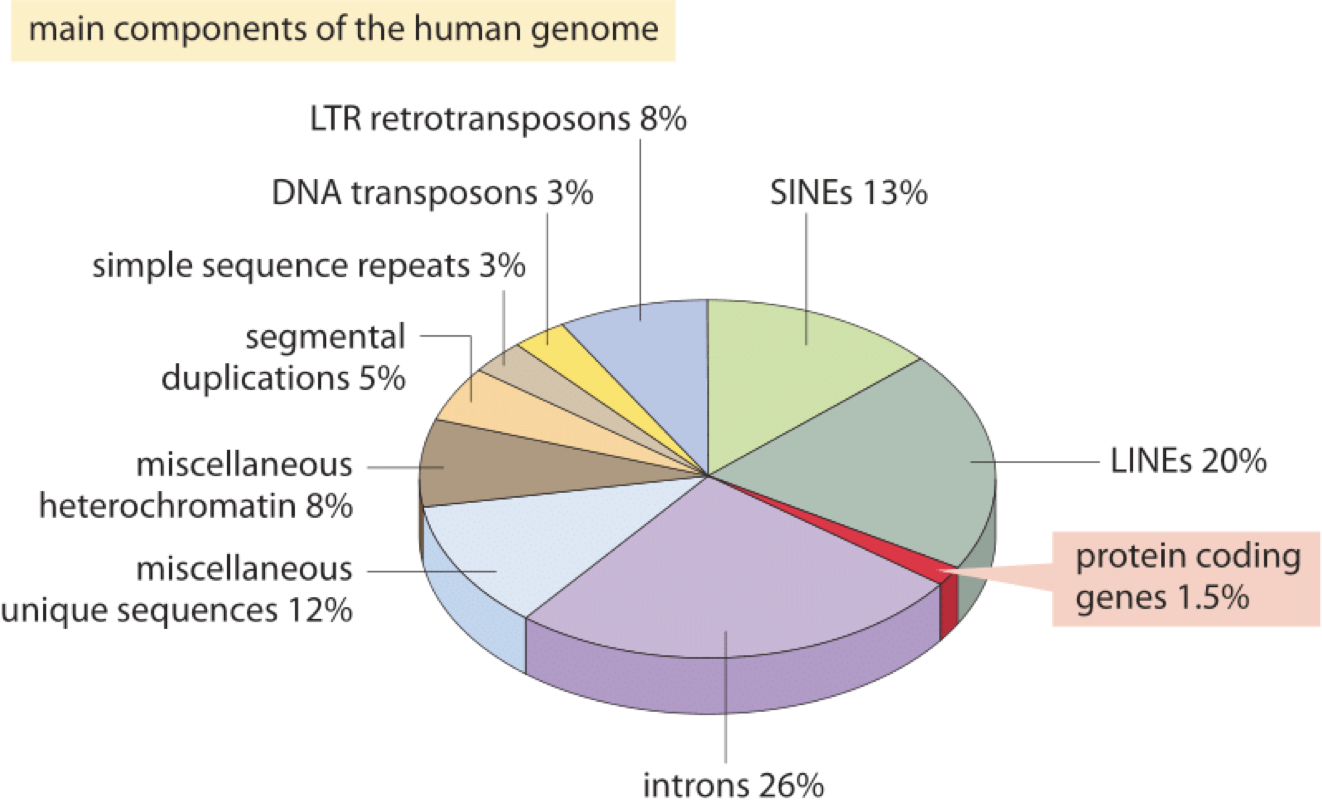

## Repeats

- In _E. coli_ In E. coli, over 1900 different 9-mers form (500,3)-clumps. Can there be that many?

- Probably not...

- What other approaches can you think of?

## A hint for next time

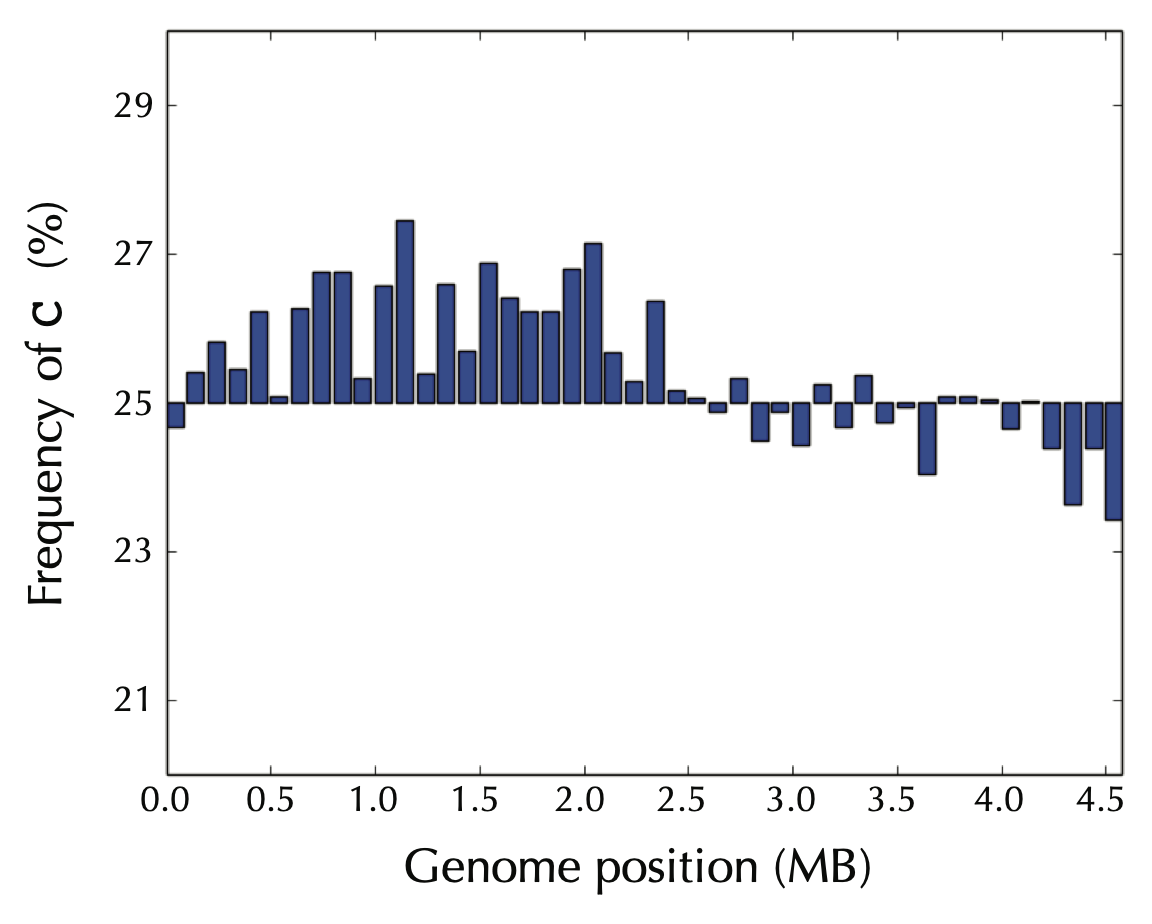